In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('Binance.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


# EDA and Data Preprocessing

In [3]:
#overall info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
#changing the format of the date column sinxe they're not uniform
df['date'] = df['date'].dt.strftime("%Y-%m-%d")

In [6]:
df.tail()


,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
1329,1.525740e+12,2018-05-08,XRP-USDT,0.82490,0.84802,0.79200,0.80667,12971303.18,10571844.13
1330,1.525650e+12,2018-05-07,XRP-USDT,0.86482,0.86886,0.80000,0.82490,17303486.40,14192279.73
1331,1.525560e+12,2018-05-06,XRP-USDT,0.90280,0.91800,0.83774,0.86483,16002035.80,13997141.56
1332,1.525480e+12,2018-05-05,XRP-USDT,0.88980,0.93500,0.88800,0.90280,16816165.30,15282000.08
1333,1.525390e+12,2018-05-04,XRP-USDT,0.50000,1.50000,0.50000,0.88990,20890213.82,18946724.69


In [7]:
#setting the date column as the index
df.index = df['date']

In [8]:
df.drop('date',axis=1,inplace=True)

In [9]:
df.head(2)

,unix,symbol,open,high,low,close,Volume XRP,Volume USDT
date,,,,,,,,
2021-12-27,1.640560e+12,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
2021-12-26,1.640480e+12,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08


<function matplotlib.pyplot.show(close=None, block=None)>

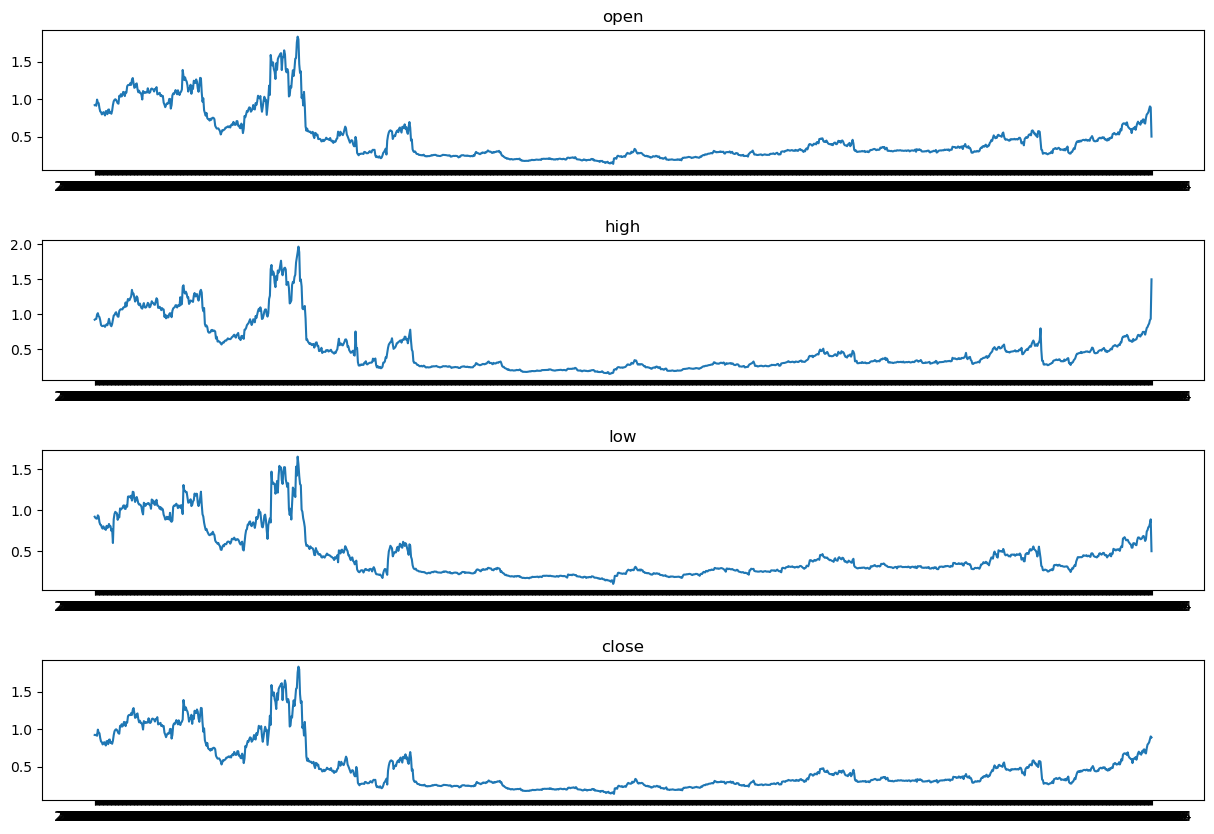

In [10]:
#plotting
plt.figure(figsize=(15,10))
cols = ['open','high','low','close']
k=0
for col in cols:
    k=k+1
    plt.subplot(4,1,k)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    plt.plot(df[col])
    plt.title(col)
plt.show

In [11]:
#dropping some of the columns not used in modelling
df.drop(['unix','symbol','Volume XRP','Volume USDT'],axis=1,inplace=True)

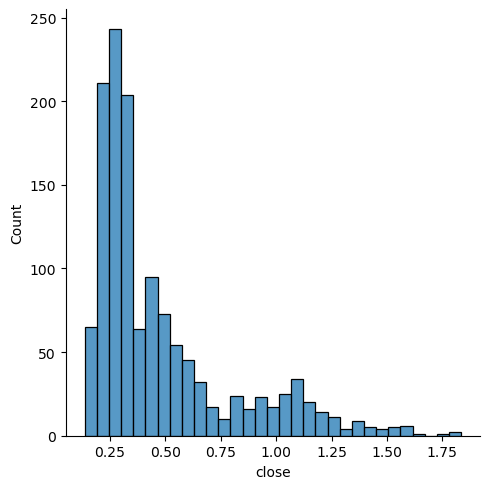

In [12]:
sns.displot(x=df['close'])

In [13]:
df.head(3)

,open,high,low,close
date,,,,
2021-12-27,0.9200,0.9237,0.9200,0.9226
2021-12-26,0.9252,0.9334,0.9052,0.9200
2021-12-25,0.9114,0.9350,0.8981,0.9252


In [14]:
df.shape

(1334, 4)

In [15]:
#splitting the dataset into training and test set
df_train = df[414:]
df_test = df[:414]

In [16]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [17]:
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

In [18]:
def split_data(data,n_past):
    X = []
    y = []
    for i in range(len(data)):
        end = i + n_past
        if end > len(data):
            break
        past = data[i:end,:]
        future = data[end-1,-4]
        X.append(past)
        y.append(future)
        
    return np.array(X),np.array(y)

In [19]:
X_train,y_train = split_data(df_train,14)
X_test,y_test = split_data(df_test,14)

In [20]:
X_train.shape

(907, 14, 4)

In [21]:
y_train.shape

(907,)

In [22]:
model = Sequential([
    LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu',return_sequences=True),
    LSTM(100,activation='relu',return_sequences=False),
    Dropout(0.2),
    Dense(1,activation ='linear')
])

In [23]:
model.compile(optimizer='adam',loss='mse')

In [24]:
history = model.fit(X_train,y_train,epochs=10,batch_size=16,validation_split=False)

Epoch 1/10

57/57 [==============================] - 10s 20ms/step - loss: 0.2459
Epoch 2/10
57/57 [==============================] - 1s 15ms/step - loss: 0.0742
Epoch 3/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0629
Epoch 4/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0601
Epoch 5/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0460
Epoch 6/10
57/57 [==============================] - 1s 15ms/step - loss: 0.0359
Epoch 7/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0247
Epoch 8/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0326
Epoch 9/10
57/57 [==============================] - 1s 16ms/step - loss: 0.0255
Epoch 10/10
57/57 [==============================] - 1s 15ms/step - loss: 0.0329


In [25]:
y_pred = model.predict(X_test)

13/13 [==============================] - 1s 9ms/step


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
print(mean_squared_error(y_test,y_pred))

6.13555140882782


In [28]:
print(y_pred)

[[ 4.94796753e+00]
 [ 5.05186844e+00]
 [ 5.16616726e+00]
 [ 4.89786005e+00]
 [ 5.05564117e+00]
 [ 5.19919157e+00]
 [ 4.88061047e+00]
 [ 4.83090782e+00]
 [ 4.63373852e+00]
 [ 4.82020283e+00]
 [ 4.75745964e+00]
 [ 5.64026356e+00]
 [ 5.82614136e+00]
 [ 6.07602310e+00]
 [ 6.16801405e+00]
 [ 6.16928673e+00]
 [ 5.93841648e+00]
 [ 6.16251373e+00]
 [ 6.54277802e+00]
 [ 6.91979218e+00]
 [ 7.02977848e+00]
 [ 7.17570543e+00]
 [ 7.35912991e+00]
 [ 7.73161840e+00]
 [ 7.86549616e+00]
 [ 7.70878696e+00]
 [ 8.05578232e+00]
 [ 8.10267544e+00]
 [ 8.48082829e+00]
 [ 9.02840614e+00]
 [ 9.02022743e+00]
 [ 9.28189564e+00]
 [ 9.49327469e+00]
 [ 9.64871025e+00]
 [ 9.94538593e+00]
 [ 1.04465685e+01]
 [ 1.02535849e+01]
 [ 9.91735744e+00]
 [ 1.00081472e+01]
 [ 1.04386044e+01]
 [ 1.06418686e+01]
 [ 1.03039436e+01]
 [ 1.00583334e+01]
 [ 1.01368904e+01]
 [ 9.99315643e+00]
 [ 9.81181622e+00]
 [ 9.57094002e+00]
 [ 9.01902962e+00]
 [ 9.36538029e+00]
 [ 9.56526852e+00]
 [ 8.98007298e+00]
 [ 9.03301048e+00]
 [ 8.9854736

In [29]:
y_pred_copies = np.repeat(y_pred,4,axis=-1)

In [30]:
predictions = scaler.inverse_transform(np.reshape(y_pred_copies,(len(y_pred),4)))[:,-4]

In [31]:
y_test_copies = np.repeat(y_test,4,axis=-1)
y_test_org = scaler.inverse_transform(np.reshape(y_test_copies,(len(y_test),4)))[:,-4]

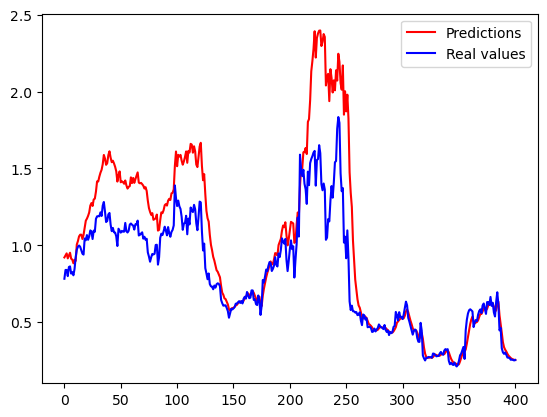

In [32]:
plt.plot(predictions,color='red',label = 'Predictions')
plt.plot(y_test_org,color='blue',label = 'Real values')
plt.legend()
plt.show()

In [33]:
y_test_org

array([0.782  , 0.8394 , 0.8391 , 0.7992 , 0.8583 , 0.8623 , 0.8154 ,
       0.8256 , 0.8045 , 0.8452 , 0.9211 , 0.9715 , 0.9898 , 0.9984 ,
       0.9899 , 0.9687 , 0.9453 , 0.9392 , 1.0439 , 1.0325 , 1.0662 ,
       1.0354 , 1.0571 , 1.0965 , 1.0892 , 1.0406 , 1.0953 , 1.0877 ,
       1.172  , 1.1879 , 1.1894 , 1.1884 , 1.2142 , 1.1902 , 1.2572 ,
       1.2815 , 1.2198 , 1.1511 , 1.1581 , 1.2004 , 1.21   , 1.1348 ,
       1.0916 , 1.1128 , 1.0845 , 1.0825 , 1.058  , 0.9951 , 1.1076 ,
       1.0951 , 1.0821 , 1.0935 , 1.0885 , 1.0885 , 1.1451 , 1.0911 ,
       1.0827 , 1.0943 , 1.1343 , 1.1415 , 1.1335 , 1.1277 , 1.1017 ,
       1.1363 , 1.1352 , 1.1604 , 1.0636 , 1.0677 , 1.0766 , 1.084  ,
       1.0429 , 1.0552 , 1.0359 , 1.0422 , 0.9535 , 0.9266 , 0.8928 ,
       0.9217 , 0.9436 , 0.9399 , 0.9442 , 1.0016 , 1.0033 , 0.874  ,
       0.9216 , 1.0483 , 1.0752 , 1.0663 , 1.0903 , 1.1207 , 1.0962 ,
       1.0644 , 1.1181 , 1.0788 , 1.0552 , 1.0868 , 1.0999 , 1.129  ,
       1.3894 , 1.30

In [34]:
df.index

Index(['2021-12-27', '2021-12-26', '2021-12-25', '2021-12-24', '2021-12-23',
       '2021-12-22', '2021-12-21', '2021-12-20', '2021-12-19', '2021-12-18',
       ...
       '2018-05-13', '2018-05-12', '2018-05-11', '2018-05-10', '2018-05-09',
       '2018-05-08', '2018-05-07', '2018-05-06', '2018-05-05', '2018-05-04'],
      dtype='object', name='date', length=1334)

In [35]:
pd.concat([pd.DataFrame(predictions,columns=['Predicted values']),pd.DataFrame(y_test_org,columns = ['Original'])],axis=1)

,Predicted values,Original
0,0.920714,0.78200
1,0.933313,0.83940
2,0.947173,0.83910
3,0.914638,0.79920
4,0.933770,0.85830
...,...,...
396,0.266314,0.25490
397,0.260553,0.25581
398,0.257276,0.25379
399,0.254777,0.25058


In [36]:
X_test

array([[[ 4.94207894,  4.47006998,  5.33276151,  4.97104102],
        [ 4.98496259,  4.54337207,  5.20356295,  4.94957624],
        [ 4.87115597,  4.55546314,  5.14158256,  4.99250581],
        ...,
        [ 4.16852378,  3.81035119,  4.30964858,  4.00099791],
        [ 4.03657407,  3.83755609,  4.08442406,  4.17519289],
        [ 3.80401271,  3.69699745,  4.03815701,  4.04392748]],

       [[ 4.98496259,  4.54337207,  5.20356295,  4.94957624],
        [ 4.87115597,  4.55546314,  5.14158256,  4.99250581],
        [ 5.55317102,  5.02096918,  5.12674218,  4.87940291],
        ...,
        [ 4.03657407,  3.83755609,  4.08442406,  4.17519289],
        [ 3.80401271,  3.69699745,  4.03815701,  4.04392748],
        [ 4.27738229,  3.87080652,  3.93689327,  3.80864043]],

       [[ 4.87115597,  4.55546314,  5.14158256,  4.99250581],
        [ 5.55317102,  5.02096918,  5.12674218,  4.87940291],
        [ 5.2208227 ,  5.17286319,  5.48291119,  5.56132257],
        ...,
        [ 3.80401271,  3.69

In [37]:
df_past = df.iloc[:14,:]

In [38]:
df_past

,open,high,low,close
date,,,,
2021-12-27,0.9200,0.9237,0.9200,0.9226
2021-12-26,0.9252,0.9334,0.9052,0.9200
2021-12-25,0.9114,0.9350,0.8981,0.9252
2021-12-24,0.9941,0.9966,0.8964,0.9115
2021-12-23,0.9538,1.0167,0.9372,0.9941
2021-12-22,0.9466,0.9738,0.9230,0.9537
2021-12-21,0.8799,0.9610,0.8527,0.9467
2021-12-20,0.8350,0.9150,0.8241,0.8798
2021-12-19,0.8263,0.8485,0.8190,0.8350


In [39]:
data = {
    'open':[0],
    'high':[0],
    'low':[0],
    'close':[0],
}
df_future = pd.DataFrame(data,index=['2021-12-28'])

In [40]:
df_future.append(df_past)

C:\Users\odhia\AppData\Local\Temp\ipykernel_5232\2537295842.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_future.append(df_past)


,open,high,low,close
2021-12-28,0.0000,0.0000,0.0000,0.0000
2021-12-27,0.9200,0.9237,0.9200,0.9226
2021-12-26,0.9252,0.9334,0.9052,0.9200
2021-12-25,0.9114,0.9350,0.8981,0.9252
2021-12-24,0.9941,0.9966,0.8964,0.9115
2021-12-23,0.9538,1.0167,0.9372,0.9941
2021-12-22,0.9466,0.9738,0.9230,0.9537
2021-12-21,0.8799,0.9610,0.8527,0.9467
2021-12-20,0.8350,0.9150,0.8241,0.8798
2021-12-19,0.8263,0.8485,0.8190,0.8350
